# Data Cleaning

In [2]:
import numpy as np 
import pandas as pd

In [32]:
df = pd.read_csv('data/laptop_price.csv', encoding='ISO-8859-1')

In [33]:
df.head()

laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  
3      2537.45  
4      1803.60

In [34]:
# simplify column namings
df = df.rename(columns=str.lower)
df = df.rename(columns={'price_euros':'price'})

# remove redundant column
df=df.drop('laptop_id', axis=1)

## Screen Resolution

In [35]:
df['screenresolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: screenresolution, Length: 1303, dtype: object

In [36]:
df['resolution'] = df['screenresolution'].str.extract(r'(\d+x\d+)')

In [37]:
df['screentype'] = df['screenresolution'].replace(r'(\d+x\d+)','',regex=True)
df['screentype'] = df['screentype'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','',regex=True)

In [38]:
df['touchscreen'] = df['screentype'].str.contains('Touchscreen')

In [39]:
df['screentype'] = df['screentype'].replace(r'(Touchscreen)','',regex=True).replace(r' ','',regex=True)
df['screentype'].value_counts()

                         938
IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [40]:
df['screentype'] = df['screentype'].replace(r'^\s*$', np.nan, regex=True)
df['screentype'].value_counts()

IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [41]:
df = df.drop('screenresolution', axis=1)
df.head()

company      product   typename  inches                         cpu   ram  \
0   Apple  MacBook Pro  Ultrabook    13.3        Intel Core i5 2.3GHz   8GB   
1   Apple  Macbook Air  Ultrabook    13.3        Intel Core i5 1.8GHz   8GB   
2      HP       250 G6   Notebook    15.6  Intel Core i5 7200U 2.5GHz   8GB   
3   Apple  MacBook Pro  Ultrabook    15.4        Intel Core i7 2.7GHz  16GB   
4   Apple  MacBook Pro  Ultrabook    13.3        Intel Core i5 3.1GHz   8GB   

                memory                           gpu  opsys  weight    price  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg  1339.69   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   898.94   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   575.00   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg  2537.45   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg  1803.60   

  resolution             screentype  touchscreen  
0  2560x1600  IPSPanelRetinaDisplay        False  
1   1440x900                    NaN        False  
2  1920x1080                    NaN        False  
3  2880x1800  IPSPanelRetinaDisplay        False  
4  2560x1600  IPSPanelRetinaDisplay        False

## CPU

In [42]:
df['cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: cpu, Length: 1303, dtype: object

In [43]:
# extract cpu freq
df['cpu(GHz)'] = df['cpu'].str.extract(r'(\d+(?:\.\d+))').astype(float)

# remove freq from `cpu` column
df['cpu']= df['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex=True)

In [44]:
df.head()

company      product   typename  inches                   cpu   ram  \
0   Apple  MacBook Pro  Ultrabook    13.3        Intel Core i5    8GB   
1   Apple  Macbook Air  Ultrabook    13.3        Intel Core i5    8GB   
2      HP       250 G6   Notebook    15.6  Intel Core i5 7200U    8GB   
3   Apple  MacBook Pro  Ultrabook    15.4        Intel Core i7   16GB   
4   Apple  MacBook Pro  Ultrabook    13.3        Intel Core i5    8GB   

                memory                           gpu  opsys  weight    price  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg  1339.69   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   898.94   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   575.00   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg  2537.45   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg  1803.60   

  resolution             screentype  touchscreen  cpu(GHz)  
0  2560x1600  IPSPanelRetinaDisplay        False       2.3  
1   1440x900                    NaN        False       1.8  
2  1920x1080                    NaN        False       2.5  
3  2880x1800  IPSPanelRetinaDisplay        False       2.7  
4  2560x1600  IPSPanelRetinaDisplay        False       3.1

## RAM

In [45]:
df['ram'] = df['ram'].str.replace('GB', '')
df.rename(columns={'ram': 'ram(GB)'}, inplace=True)
df['ram(GB)'] = df['ram(GB)'].astype(int)
df.head()

company      product   typename  inches                   cpu  ram(GB)  \
0   Apple  MacBook Pro  Ultrabook    13.3        Intel Core i5         8   
1   Apple  Macbook Air  Ultrabook    13.3        Intel Core i5         8   
2      HP       250 G6   Notebook    15.6  Intel Core i5 7200U         8   
3   Apple  MacBook Pro  Ultrabook    15.4        Intel Core i7        16   
4   Apple  MacBook Pro  Ultrabook    13.3        Intel Core i5         8   

                memory                           gpu  opsys  weight    price  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg  1339.69   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   898.94   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   575.00   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg  2537.45   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg  1803.60   

  resolution             screentype  touchscreen  cpu(GHz)  
0  2560x1600  IPSPanelRetinaDisplay        False       2.3  
1   1440x900                    NaN        False       1.8  
2  1920x1080                    NaN        False       2.5  
3  2880x1800  IPSPanelRetinaDisplay        False       2.7  
4  2560x1600  IPSPanelRetinaDisplay        False       3.1

## Memory

In [46]:
df['memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: memory, Length: 1303, dtype: object

In [47]:
df['memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [48]:
# unify the units
df['memory']=df['memory'].str.replace('1.0TB','1TB', regex=True)
df['memory']=df['memory'].str.replace('1TB','1000GB')
df['memory']=df['memory'].str.replace('2TB','2000GB')
df['memory']=df['memory'].str.replace('GB','')
df['memory']=df['memory'].str.replace(r' ','')
df['memory'].value_counts()

256SSD                    412
1000HDD                   224
500HDD                    132
512SSD                    118
128SSD+1000HDD             94
128SSD                     76
256SSD+1000HDD             73
32FlashStorage             38
2000HDD                    16
64FlashStorage             15
512SSD+1000HDD             14
1000SSD                    14
256SSD+2000HDD             10
1000Hybrid                  9
256FlashStorage             8
16FlashStorage              7
32SSD                       6
180SSD                      5
128FlashStorage             4
512SSD+2000HDD              3
16SSD                       3
512FlashStorage             2
1000SSD+1000HDD             2
256SSD+500HDD               2
128SSD+2000HDD              2
256SSD+256SSD               2
512SSD+256SSD               1
512SSD+512SSD               1
64FlashStorage+1000HDD      1
1000HDD+1000HDD             1
32HDD                       1
64SSD                       1
128HDD                      1
240SSD    

In [49]:
df[['memory1','memory2']] = df.memory.str.split("+",expand=True)
df['memory_1_storage_gb'] = df['memory1'].str.extract(r'(\d+)').astype(float)
df['memory_1_type'] = df['memory1'].str.replace('\d+', '')
df['memory_2_storage_gb'] = df['memory2'].str.extract(r'(\d+)').astype(float)
df['memory_2_type'] = df['memory2'].str.replace('\d+', '')
df = df.drop('memory1', axis=1)
df = df.drop('memory2', axis=1)
df = df.drop('memory', axis=1)
df = df.replace({'NaN': np.nan})
df['memory_2_storage_gb'] = df['memory_2_storage_gb'].replace(np.nan, 0)

<ipython-input-49-054273f9b2ee>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['memory_1_type'] = df['memory1'].str.replace('\d+', '')
<ipython-input-49-054273f9b2ee>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['memory_2_type'] = df['memory2'].str.replace('\d+', '')


In [50]:
df.head()

company      product   typename  inches                   cpu  ram(GB)  \
0   Apple  MacBook Pro  Ultrabook    13.3        Intel Core i5         8   
1   Apple  Macbook Air  Ultrabook    13.3        Intel Core i5         8   
2      HP       250 G6   Notebook    15.6  Intel Core i5 7200U         8   
3   Apple  MacBook Pro  Ultrabook    15.4        Intel Core i7        16   
4   Apple  MacBook Pro  Ultrabook    13.3        Intel Core i5         8   

                            gpu  opsys  weight    price resolution  \
0  Intel Iris Plus Graphics 640  macOS  1.37kg  1339.69  2560x1600   
1        Intel HD Graphics 6000  macOS  1.34kg   898.94   1440x900   
2         Intel HD Graphics 620  No OS  1.86kg   575.00  1920x1080   
3            AMD Radeon Pro 455  macOS  1.83kg  2537.45  2880x1800   
4  Intel Iris Plus Graphics 650  macOS  1.37kg  1803.60  2560x1600   

              screentype  touchscreen  cpu(GHz)  memory_1_storage_gb  \
0  IPSPanelRetinaDisplay        False       2.3                128.0   
1                    NaN        False       1.8                128.0   
2                    NaN        False       2.5                256.0   
3  IPSPanelRetinaDisplay        False       2.7                512.0   
4  IPSPanelRetinaDisplay        False       3.1                256.0   

  memory_1_type  memory_2_storage_gb memory_2_type  
0           SSD                  0.0          None  
1  FlashStorage                  0.0          None  
2           SSD                  0.0          None  
3           SSD                  0.0          None  
4           SSD                  0.0          None

## Weight

In [51]:
df['weight'].value_counts()

2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: weight, Length: 179, dtype: int64

In [52]:
df['weight'] = df['weight'].str.replace('kg','').astype(float)
df.rename(columns={'weight': 'weight(kg)'}, inplace=True)

In [53]:
df.head()

company      product   typename  inches                   cpu  ram(GB)  \
0   Apple  MacBook Pro  Ultrabook    13.3        Intel Core i5         8   
1   Apple  Macbook Air  Ultrabook    13.3        Intel Core i5         8   
2      HP       250 G6   Notebook    15.6  Intel Core i5 7200U         8   
3   Apple  MacBook Pro  Ultrabook    15.4        Intel Core i7        16   
4   Apple  MacBook Pro  Ultrabook    13.3        Intel Core i5         8   

                            gpu  opsys  weight(kg)    price resolution  \
0  Intel Iris Plus Graphics 640  macOS        1.37  1339.69  2560x1600   
1        Intel HD Graphics 6000  macOS        1.34   898.94   1440x900   
2         Intel HD Graphics 620  No OS        1.86   575.00  1920x1080   
3            AMD Radeon Pro 455  macOS        1.83  2537.45  2880x1800   
4  Intel Iris Plus Graphics 650  macOS        1.37  1803.60  2560x1600   

              screentype  touchscreen  cpu(GHz)  memory_1_storage_gb  \
0  IPSPanelRetinaDisplay        False       2.3                128.0   
1                    NaN        False       1.8                128.0   
2                    NaN        False       2.5                256.0   
3  IPSPanelRetinaDisplay        False       2.7                512.0   
4  IPSPanelRetinaDisplay        False       3.1                256.0   

  memory_1_type  memory_2_storage_gb memory_2_type  
0           SSD                  0.0          None  
1  FlashStorage                  0.0          None  
2           SSD                  0.0          None  
3           SSD                  0.0          None  
4           SSD                  0.0          None

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1303 non-null   object 
 1   product              1303 non-null   object 
 2   typename             1303 non-null   object 
 3   inches               1303 non-null   float64
 4   cpu                  1303 non-null   object 
 5   ram(GB)              1303 non-null   int64  
 6   gpu                  1303 non-null   object 
 7   opsys                1303 non-null   object 
 8   weight(kg)           1303 non-null   float64
 9   price                1303 non-null   float64
 10  resolution           1303 non-null   object 
 11  screentype           365 non-null    object 
 12  touchscreen          1303 non-null   bool   
 13  cpu(GHz)             1217 non-null   float64
 14  memory_1_storage_gb  1303 non-null   float64
 15  memory_1_type        1303 non-null   o

### Train test split

In [55]:
import numpy as np
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.1, random_state=42)

In [57]:
laptop_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
laptop_test = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

In [58]:
laptop_train

company                            product            typename  inches  \
0       Dell                      Inspiron 3567            Notebook    15.6   
1     Lenovo                 Legion Y520-15IKBN              Gaming    15.6   
2       Dell                             XPS 13           Ultrabook    13.3   
3       Asus               ZenBook UX305CA-UBM1           Ultrabook    13.3   
4       Dell                      Inspiron 3567            Notebook    15.6   
...      ...                                ...                 ...     ...   
1167    Acer                     Aspire F5-573G            Notebook    15.6   
1168      HP  15-bs078cl (i7-7500U/8GB/2TB/W10)            Notebook    15.6   
1169      HP                Pavilion 15-AW003nv            Notebook    15.6   
1170  Lenovo                      ThinkPad E570            Notebook    15.6   
1171  Lenovo                          Yoga Book  2 in 1 Convertible    10.1   

                        cpu  ram(GB)                      gpu       opsys  \
0      Intel Core i3 7100U         6    Intel HD Graphics 620  Windows 10   
1     Intel Core i5 7300HQ         8  Nvidia GeForce GTX 1050  Windows 10   
2      Intel Core i7 8550U         8   Intel UHD Graphics 620  Windows 10   
3        Intel Core M 6Y30         8    Intel HD Graphics 515  Windows 10   
4      Intel Core i3 6006U         4       AMD Radeon R5 M430       Linux   
...                     ...      ...                      ...         ...   
1167   Intel Core i5 7200U         8  Nvidia GeForce GTX 950M  Windows 10   
1168   Intel Core i7 7500U         8    Intel HD Graphics 620  Windows 10   
1169    AMD A9-Series 9410         6       AMD Radeon R7 M440  Windows 10   
1170   Intel Core i5 7200U         8    Intel HD Graphics 620  Windows 10   
1171   Intel Atom x5-Z8550         4    Intel HD Graphics 400  Windows 10   

      weight(kg) resolution screentype  touchscreen  cpu(GHz)  \
0           2.30   1366x768        NaN        False      2.40   
1           2.50  1920x1080   IPSPanel        False      2.50   
2           1.20  1920x1080        NaN        False      1.80   
3           1.20  1920x1080   IPSPanel        False      0.90   
4           2.25   1366x768        NaN        False      2.00   
...          ...        ...        ...          ...       ...   
1167        2.40  1920x1080        NaN        False      2.50   
1168        2.04   1366x768        NaN        False      2.70   
1169        2.04  1920x1080        NaN        False      2.90   
1170        2.30  1920x1080   IPSPanel        False      2.50   
1171        0.69  1920x1200   IPSPanel         True      1.44   

      memory_1_storage_gb memory_1_type  memory_2_storage_gb memory_2_type  \
0                  1000.0           HDD                  0.0          None   
1                   256.0           SSD                  0.0          None   
2                   256.0           SSD                  0.0          None   
3                   512.0           SSD                  0.0          None   
4                  1000.0           HDD                  0.0          None   
...                   ...           ...                  ...           ...   
1167                256.0           SSD               1000.0           HDD   
1168               2000.0           HDD                  0.0          None   
1169               1000.0        Hybrid                  0.0          None   
1170               1000.0           HDD                  0.0          None   
1171                 64.0  FlashStorage                  0.0          None   

        price  
0      459.00  
1      829.00  
2     1579.00  
3      729.00  
4      465.62  
...       ...  
1167   799.00  
1168   629.00  
1169   549.99  
1170   850.66  
1171   479.00  

[1172 rows x 18 columns]

In [59]:
laptop_test

company              product   typename  inches                    cpu  \
0    Toshiba    Portege X30-D-10J   Notebook    13.3   Intel Core i5 7200U    
1         HP    Spectre 13-V100nv   Notebook    13.3   Intel Core i5 7200U    
2     Lenovo    IdeaPad 310-15ABR   Notebook    15.6  AMD A10-Series 9600P    
3     Lenovo   IdeaPad Y700-15ISK   Notebook    15.6  Intel Core i7 6700HQ    
4         HP        EliteBook 820  Ultrabook    12.5   Intel Core i5 6200U    
..       ...                  ...        ...     ...                    ...   
126     Dell        Latitude 5480  Ultrabook    14.0   Intel Core i7 7600U    
127     Dell        Inspiron 3567   Notebook    15.6   Intel Core i5 7200U    
128       HP         Omen 17-W295     Gaming    17.3  Intel Core i7 7700HQ    
129       HP  Pavilion 15-CK000nv  Ultrabook    15.6   Intel Core i7 8550U    
130       HP          Probook 470   Notebook    17.3   Intel Core i7 8550U    

     ram(GB)                       gpu       opsys  weight(kg) resolution  \
0          8     Intel HD Graphics 620  Windows 10        1.05  1920x1080   
1          8     Intel HD Graphics 620  Windows 10        1.11  1920x1080   
2          6         AMD Radeon R5 430  Windows 10        2.40  1920x1080   
3          8   Nvidia GeForce GTX 960M  Windows 10        2.60  1920x1080   
4          4     Intel HD Graphics 520  Windows 10        1.26   1366x768   
..       ...                       ...         ...         ...        ...   
126        8     Intel HD Graphics 620       Linux        1.60  1920x1080   
127       12     Intel HD Graphics 620  Windows 10        2.25   1366x768   
128       16   Nvidia GeForce GTX 1050  Windows 10        3.35  1920x1080   
129        8  Nvidia GeForce GTX 940MX  Windows 10        1.83  1920x1080   
130       16     Nvidia GeForce 930MX   Windows 10        2.50  1920x1080   

    screentype  touchscreen  cpu(GHz)  memory_1_storage_gb memory_1_type  \
0     IPSPanel        False       2.5                256.0           SSD   
1     IPSPanel        False       2.5                256.0           SSD   
2          NaN        False       2.4               1000.0           HDD   
3     IPSPanel        False       2.6               1000.0           HDD   
4          NaN        False       2.3                256.0           SSD   
..         ...          ...       ...                  ...           ...   
126        NaN        False       2.8                256.0           SSD   
127        NaN        False       2.5               1000.0           HDD   
128   IPSPanel        False       2.8                256.0           SSD   
129   IPSPanel        False       1.8                256.0           SSD   
130        NaN        False       1.8                512.0           SSD   

     memory_2_storage_gb memory_2_type   price  
0                    0.0          None  1672.0  
1                    0.0          None  1149.0  
2                    0.0          None   499.0  
3                    0.0          None   899.0  
4                    0.0          None  1244.0  
..                   ...           ...     ...  
126                  0.0          None  1099.0  
127                  0.0          None   649.0  
128               1000.0           HDD  1379.0  
129                  0.0          None   699.0  
130                  0.0          None  1271.0  

[131 rows x 18 columns]

In [ ]:
#laptop_train.to_csv('data/laptop_train.csv', index=False)
#laptop_test.to_csv('data/laptop_test.csv', index=False)

---

# Outliers

In [60]:
import matplotlib.pyplot as plt

In [61]:
#df = pd.read_csv('data/laptop_train.csv', encoding='ISO-8859-1')
df = laptop_train.copy()

In [62]:
df['company'].value_counts()

Lenovo       273
Dell         264
HP           244
Asus         141
Acer          95
MSI           49
Toshiba       43
Apple         20
Samsung        7
Razer          6
Microsoft      5
Mediacom       5
Vero           4
Fujitsu        3
Google         3
LG             3
Chuwi          3
Huawei         2
Xiaomi         2
Name: company, dtype: int64

In [63]:
df['typename'].value_counts()

Notebook              652
Gaming                184
Ultrabook             179
2 in 1 Convertible    104
Workstation            28
Netbook                25
Name: typename, dtype: int64

In [64]:
df['inches'].value_counts()

15.6    597
14.0    178
17.3    145
13.3    144
12.5     38
11.6     31
13.9      6
12.0      5
12.3      5
13.5      5
15.4      4
15.0      4
10.1      4
13.0      2
18.4      1
11.3      1
14.1      1
17.0      1
Name: inches, dtype: int64

In [65]:
# let's keep only 6 most popular sizes
df = df[df.inches.isin([15.6, 14.0, 13.3, 17.3, 12.5, 11.6])]

In [66]:
df['cpu'].value_counts()

Intel Core i5 7200U        166
Intel Core i7 7700HQ       139
Intel Core i7 7500U        118
Intel Core i3 6006U         77
Intel Core i7 8550U         66
                          ... 
Intel Xeon E3-1505M V6       1
AMD FX 8800P                 1
Intel Core M M7-6Y75         1
Intel Atom x5-Z8300          1
Intel Core i5 6440HQ         1
Name: cpu, Length: 78, dtype: int64

In [67]:
df['ram(GB)'].value_counts()

8     526
4     339
16    176
6      36
12     21
2      19
32     12
24      3
64      1
Name: ram(GB), dtype: int64

In [68]:
df[df['ram(GB)'] == 64]

company     product typename  inches                    cpu  ram(GB)  \
140    Asus  ROG G701VO   Gaming    17.3  Intel Core i7 6820HK        64   

                         gpu       opsys  weight(kg) resolution screentype  \
140  Nvidia GeForce GTX 980   Windows 10        3.58  1920x1080   IPSPanel   

     touchscreen  cpu(GHz)  memory_1_storage_gb memory_1_type  \
140        False       2.7               1000.0           SSD   

     memory_2_storage_gb memory_2_type   price  
140                  0.0          None  3975.0

In [69]:
df = df[df['ram(GB)'] != 64]

In [70]:
df['gpu'].value_counts()

Intel HD Graphics 620       244
Intel HD Graphics 520       173
Nvidia GeForce GTX 1050      60
Intel UHD Graphics 620       57
Nvidia GeForce GTX 1060      43
                           ... 
Intel Iris Graphics 550       1
Nvidia Quadro M500M           1
Nvidia GeForce 920            1
Nvidia GeForce GTX 1070M      1
Intel HD Graphics 530         1
Name: gpu, Length: 97, dtype: int64

In [71]:
df['opsys'].value_counts()

Windows 10      942
Linux            57
No OS            55
Windows 7        44
Chrome OS        21
macOS             8
Mac OS X          3
Windows 10 S      2
Name: opsys, dtype: int64

In [72]:
df['weight(kg)'].value_counts()

2.20    110
2.10     53
2.00     41
2.40     40
2.50     35
       ... 
1.98      1
4.70      1
1.41      1
3.25      1
1.14      1
Name: weight(kg), Length: 160, dtype: int64

(array([119., 215., 230., 347., 133.,  31.,  21.,   6.,  11.,  19.]),
 array([0.91 , 1.289, 1.668, 2.047, 2.426, 2.805, 3.184, 3.563, 3.942,
        4.321, 4.7  ]),
 <a list of 10 Patch objects>)

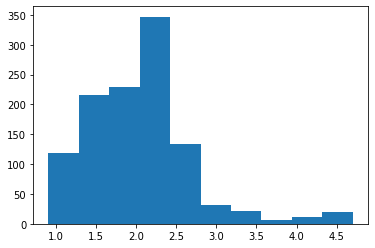

In [73]:
plt.hist(df['weight(kg)'])

(array([379., 369., 200., 113.,  48.,  15.,   4.,   2.,   1.,   1.]),
 array([ 174. ,  706.5, 1239. , 1771.5, 2304. , 2836.5, 3369. , 3901.5,
        4434. , 4966.5, 5499. ]),
 <a list of 10 Patch objects>)

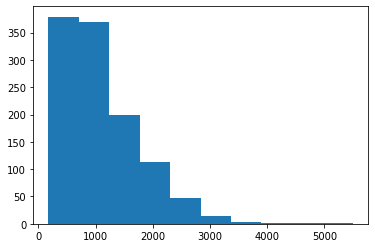

In [74]:
plt.hist(df['price'])

In [75]:
df[df['price'] > 3500]

company            product     typename  inches                      cpu  \
33    Lenovo       Thinkpad P51     Notebook    15.6  Intel Xeon E3-1535M v6    
259     Dell       Alienware 17       Gaming    17.3    Intel Core i7 7700HQ    
486     Asus  ROG G703VI-E5062T       Gaming    17.3    Intel Core i7 7820HK    
563     Dell       Alienware 17       Gaming    17.3    Intel Core i7 7700HQ    
799    Razer          Blade Pro       Gaming    17.3    Intel Core i7 7820HK    
930       HP           Zbook 17  Workstation    17.3  Intel Xeon E3-1535M v5    
1017      HP           ZBook 17  Workstation    17.3    Intel Core i7 6700HQ    

      ram(GB)                       gpu       opsys  weight(kg) resolution  \
33         32      Nvidia Quadro M2200M  Windows 10        2.50  3840x2160   
259        32   Nvidia GeForce GTX 1070  Windows 10        4.36  3840x2160   
486        32   Nvidia GeForce GTX 1080  Windows 10        4.70  1920x1080   
563        32  Nvidia GeForce GTX 1070M  Windows 10        4.42  1920x1080   
799        32   Nvidia GeForce GTX 1080  Windows 10        3.49  3840x2160   
930        16      Nvidia Quadro M2000M   Windows 7        3.00  1920x1080   
1017        8      Nvidia Quadro M3000M   Windows 7        3.00  1920x1080   

     screentype  touchscreen  cpu(GHz)  memory_1_storage_gb memory_1_type  \
33     IPSPanel        False       3.1               1000.0           SSD   
259         NaN        False       2.8               1000.0           SSD   
486         NaN        False       2.9                512.0           SSD   
563    IPSPanel        False       2.8               1000.0           SSD   
799         NaN         True       2.9                512.0           SSD   
930    IPSPanel        False       2.9                256.0           SSD   
1017   IPSPanel        False       2.6                256.0           SSD   

      memory_2_storage_gb memory_2_type   price  
33                    0.0          None  4899.0  
259                1000.0           HDD  3659.4  
486                1000.0           HDD  3890.0  
563                1000.0           HDD  3588.8  
799                   0.0          None  5499.0  
930                   0.0          None  4389.0  
1017                  0.0          None  3949.4

In [76]:
df['log_price'] = np.log(df['price'])

(array([ 19.,  55., 131., 162., 206., 239., 194.,  96.,  26.,   4.]),
 array([5.1590553 , 5.50438192, 5.84970855, 6.19503517, 6.54036179,
        6.88568842, 7.23101504, 7.57634167, 7.92166829, 8.26699491,
        8.61232154]),
 <a list of 10 Patch objects>)

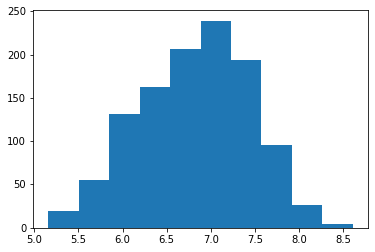

In [77]:
plt.hist(df['log_price'])

In [78]:
df = df.drop('price', axis=1)

In [79]:
df['resolution'].value_counts()

1920x1080    744
1366x768     275
3840x2160     36
3200x1800     23
1600x900      22
2560x1440     22
2560x1600      6
1440x900       4
Name: resolution, dtype: int64

In [80]:
df['screentype'].value_counts()

IPSPanel                 295
IPSPanelRetinaDisplay      6
Name: screentype, dtype: int64

In [81]:
df['touchscreen'].value_counts()

False    982
True     150
Name: touchscreen, dtype: int64

(array([ 50.,  12., 132.,  72.,  27., 380., 204., 167.,   4.,   4.]),
 array([0.9 , 1.17, 1.44, 1.71, 1.98, 2.25, 2.52, 2.79, 3.06, 3.33, 3.6 ]),
 <a list of 10 Patch objects>)

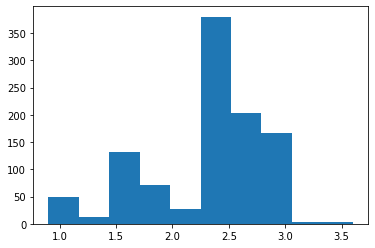

In [82]:
plt.hist(df['cpu(GHz)'])

(array([217., 439., 242.,   0., 224.,   0.,   0.,   0.,   0.,  10.]),
 array([   8. ,  207.2,  406.4,  605.6,  804.8, 1004. , 1203.2, 1402.4,
        1601.6, 1800.8, 2000. ]),
 <a list of 10 Patch objects>)

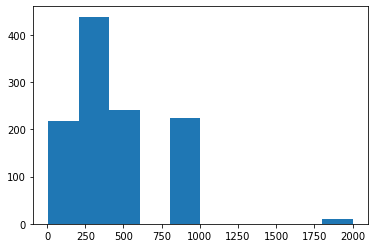

In [83]:
plt.hist(df['memory_1_storage_gb'])

In [84]:
df['memory_1_type'].value_counts()

SSD             731
HDD             336
FlashStorage     55
Hybrid           10
Name: memory_1_type, dtype: int64

(array([945.,   2.,   3.,   0.,   0., 169.,   0.,   0.,   0.,  13.]),
 array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800., 2000.]),
 <a list of 10 Patch objects>)

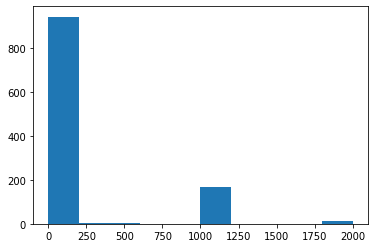

In [85]:
plt.hist(df['memory_2_storage_gb'])

In [86]:
df['memory_2_type'].value_counts()

HDD       183
SSD         3
Hybrid      1
Name: memory_2_type, dtype: int64

---

# Export ready datasets

In [87]:
# I also modify test dataset by putting log on the price
laptop_test['log_price'] = np.log(laptop_test['price'])
laptop_test = laptop_test.drop('price', axis=1)

In [88]:
df.to_csv('data/laptop_train.csv', index=False)
laptop_test.to_csv('data/laptop_test.csv', index=False)